In [2]:
library("InterSIM", quietly = TRUE)
source("runfactorization.R")

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 27/28

  To enable shared memory capabilities, try: install.extras('
NMF
')

Loading required package: mclust

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: ade4


Attaching package: ‘ade4’


The following object is masked from ‘package:BiocGenerics’:

    score



Attaching package: ‘GPArotation’


The following object is masked from ‘package:NMF’:

    entropy



Attaching package: ‘MOFAtools’


The following objects are masked from ‘package:NMF’:

    featureNames, featureNames<-, predict, sampleNames, sampleNames<-


The following objects are masked from ‘package:Biobase’:

    featureNames, featureNames<-, sampleNames, sampleNames<-


The following object is masked from ‘package:stats’:

    predict


Loading required package: JADE

Loading required package: lattice

Loading required package: caTools

Loading required p

In [21]:
# Base folder for data
data_folder <- "../data/"
# Label to identify current run
tag <- format(Sys.time(), "%Y%m%d%H%M%S")
# Folder containing simulated data
simul_folder <- paste0(data_folder, "simulations_", tag, "/") 
# Folder for comparison results
results_folder <- paste0("../results", tag, "/")
print(data_folder)
print(tag)
print(simul_folder)
print(results_folder)
dir.create(data_folder, showWarnings = FALSE)
dir.create(simul_folder, showWarnings = FALSE)
dir.create(results_folder, showWarnings = FALSE)


[1] "../data/"
[1] "20210329212141"
[1] "../data/simulations_20210329212141/"
[1] "../results20210329212141/"


In [34]:
list_clusters <- seq(5,15,5)
list_distrib <-  c("heterogeneous","equal")

# For a given number of clusters
for(size in list_distrib) {
    thisdir1 <- paste(simul_folder,size, sep="")
    dir.create(thisdir1, showWarnings = FALSE)
    # Data distribution among clusters will either be heterogeneous or equal 
    for (num.clusters in list_clusters) {
        thisdir2 <- paste(thisdir1,"/",num.clusters, sep="")
        dir.create(thisdir2, showWarnings = FALSE)
        }
    }
        

In [35]:
## Simulate data
## INPUTS:
# folder = location  where the simulated data should be saved
# num.clusters = number of clusters to be imposed on the data
# size = heterogeneous for heterogeneous clusters, equal for equally-sized clusters
## OUPUTS: matrices of simulated data are saved to file in folder
##模拟数据
##输入：
#folder=应保存模拟数据的位置
#num.clusters =要施加在数据上的集群数
#size =对于异构集群，heterogeneous，对于相等大小的集群，equal
## OUPUTS：模拟数据矩阵保存到文件夹中的文件中
simulated_data_generation <- function(out.folder, num.clusters, size="heterogeneous", predefined=TRUE) {
    
    # Number of clusters
    num.clusters <- as.numeric(num.clusters)
    # Size of the effect
    effect <- 2.5
    # Sample proportions per clusters defined here are those used for the paper
    #此处定义的每类样本比例是本文使用的比例
    prop_predefined <- list(
        "heterogeneous" = list(
            "5" = c(0.35, 0.13, 0.19, 0.08, 0.25),
            "10" = c(0.20, 0.10, 0.07, 0.10, 0.15, 0.13, 0.10, 0.08, 0.05, 0.02),
            "15" = c(0.10,0.08,0.04,0.03,0.12,0.03,0.10,0.03,0.05,0.02,0.1,0.2,0.03,0.02,0.05)
        ),
        "equal" = list(
            "5" = c(0.25,0.2,0.2,0.2,0.15),
            "10" = c(0.15,0.1,0.1,0.1,0.1,0.1,0.05,0.1,0.1,0.1),
            "15" = c(0.07,0.07,0.07,0.06,0.07,0.07,0.07,0.06,0.07,0.06,0.07,0.06,0.07,0.06,0.07)
        )
    )

    # Check provided parameter (size) against allowed values
    if(! size %in% names(prop_predefined)) {
        print(paste0("ERROR: size can only assume value : ", 
                     paste0(names(prop_predefined), collapse=","),
                     " found : ", size))
    }

    # If article proportions are to be used
    if(predefined) {
        # Check provided parameter (number of clusters) against allowed values
        if(! as.character(num.clusters) %in% names(prop_predefined[[size]])) {
            print(paste0("ERROR: num.clusters can only assume value : ", 
                         paste0(names(prop_predefined[[size]]), collapse=","),
                         " found : ",
                         num.clusters))
        }
        prop <- prop_predefined[[size]][[as.character(num.clusters)]]
        prop[1] <- 1-sum(prop[-1])
    }
    # Otherwise
    else {
        if(size == "equal") {
            # Could be simplified! Only necessary because InterSIM is "easily offended" :
            # ensure same object type as in the heterogeneous case, and that not all 
            # values are exactly the same (should not impact the number of samples per group)
            # - same type
            equals <- rep(1, num.clusters)
            prop <- equals/sum(equals)
            # - slightly imbalanced
            delta <- 0.05*prop[1]
            prop[1] <- prop[1]+delta
            prop[num.clusters] <- prop[num.clusters]-delta
            # - sum is 1
            prop <- round(prop, digits = 10)
            prop[1] <- 1-sum(prop[-1])
        }
        else {
            random <- runif(n = num.clusters, min = 0, max = 1)
            prop <- random/sum(random)
        }
    }

    # Simulate data based on provided parameters
    print(prop)
    print(sum(prop))
    print(sum(prop)==1)
    sim.D <- InterSIM(n.sample=100, cluster.sample.prop=prop, 
                      delta.methyl=effect, delta.expr=effect, delta.protein=effect, 
                      p.DMP=0.25, p.DEG=NULL, p.DEP=NULL,
                      do.plot=FALSE, sample.cluster=TRUE, feature.cluster=TRUE)
                      
    
    thisdir <- paste(out.folder,size,"/",num.clusters, sep="")
    print(thisdir)
    #dir.create(paste(out.folder,size,num.clusters, sep="/"), showWarnings = FALSE)
    #dir.create(paste(out.folder,size,num.clusters, sep="/"), showWarnings = FALSE)
    #dir.create(paste(out.folder,size,num.clusters, sep="/"), showWarnings = FALSE)

                

    # Export simulations as tables
    write.table(sim.D$clustering.assignment, paste(thisdir, "clusters.txt", sep="/"), sep="\t")
    write_table_with_index_header(t(sim.D$dat.methyl), paste(thisdir, "omics1.txt", sep="/"))
    write_table_with_index_header(t(sim.D$dat.expr), paste(thisdir, "omics2.txt", sep="/"))
    write_table_with_index_header(t(sim.D$dat.protein), paste(thisdir, "omics3.txt", sep="/"))

    return("data saved in folder")
}

## Support function
write_table_with_index_header <- function(data, file, sep="\t") {
    write.table(cbind(probe=row.names(data),data), file, sep = sep, 
                append = FALSE, quote = FALSE, row.names = FALSE, col.names = TRUE)
}

In [36]:
## Simulate data, factorize and compare the results

list_clusters <- seq(5,15,5)
list_distrib <-  c("heterogeneous","equal")

# For a given number of clusters
for(num.clusters in list_clusters) {
    # Data distribution among clusters will either be heterogeneous or equal 
    for (size in list_distrib) {
        
        print("##########")
        print(paste0("-> Distribution: ", size, ", Nb clusters: ", num.clusters))
        
        # Make simulated data
        print("-> Simulating data...")
        simulated_data_generation(simul_folder, num.clusters, size, predefined=TRUE)
        
        print("-> Done.")
    }
}

[1] "##########"
[1] "-> Distribution: heterogeneous, Nb clusters: 5"
[1] "-> Simulating data..."
[1] 0.35 0.13 0.19 0.08 0.25
[1] 1
[1] TRUE
[1] "../data/simulations_20210329212141/heterogeneous/5"
[1] "-> Done."
[1] "##########"
[1] "-> Distribution: equal, Nb clusters: 5"
[1] "-> Simulating data..."
[1] 0.25 0.20 0.20 0.20 0.15
[1] 1
[1] TRUE
[1] "../data/simulations_20210329212141/equal/5"
[1] "-> Done."
[1] "##########"
[1] "-> Distribution: heterogeneous, Nb clusters: 10"
[1] "-> Simulating data..."
 [1] 0.20 0.10 0.07 0.10 0.15 0.13 0.10 0.08 0.05 0.02
[1] 1
[1] TRUE
[1] "../data/simulations_20210329212141/heterogeneous/10"
[1] "-> Done."
[1] "##########"
[1] "-> Distribution: equal, Nb clusters: 10"
[1] "-> Simulating data..."
 [1] 0.15 0.10 0.10 0.10 0.10 0.10 0.05 0.10 0.10 0.10
[1] 1
[1] TRUE
[1] "../data/simulations_20210329212141/equal/10"
[1] "-> Done."
[1] "##########"
[1] "-> Distribution: heterogeneous, Nb clusters: 15"
[1] "-> Simulating data..."
 [1] 0.10 0.08 0.04 0

In [3]:
out <- runfactorization("../data/simulations_20210329212141/equal/5", paste0("omics",1:3,".txt"), 5, sep="\t", filtering="none")

Warning message in createMOFAobject(omics):
“View names are not specified in the data, renaming them to: view_1, view_2, view_3
”
Creating MOFA object from list of matrices,
 please make sure that samples are columns and features are rows...


Checking data options...

Checking training options...

Checking model options...



[1] "No output file provided, using a temporary file..."
Generating warm start... 
K=6:12


In [46]:
print(out$icluster.clusters)

           [,1]
subject1      9
subject2      1
subject3     12
subject4     13
subject5     11
subject6     14
subject7     12
subject8     12
subject9     16
subject10    15
subject11     3
subject12     3
subject13    12
subject14    15
subject15    16
subject16    14
subject17     5
subject18    15
subject19    15
subject20    15
subject21     3
subject22     9
subject23    10
subject24    12
subject25     1
subject26    14
subject27     7
subject28    12
subject29     7
subject30    12
subject31     8
subject32    12
subject33    16
subject34    16
subject35     1
subject36    14
subject37     9
subject38    12
subject39     6
subject40     9
subject41    10
subject42    14
subject43     4
subject44    13
subject45    12
subject46    11
subject47    15
subject48    13
subject49     3
subject50     4
subject51     2
subject52    16
subject53    10
subject54     4
subject55     7
subject56     3
subject57    15
subject58     8
subject59    13
subject60    16
subject61     8
subject6

In [1]:
##### runfactoization runs all the considered multi-omics factorization
### the required inputs are:
### "folder" corresponding to the path to the folder where the input files are contained, in the idea that all omics matrices are organized inside a unique folder
### "file.names" corresponding to a vector containing the names of all the omics files
### "num.factors" containing the number of factors in which we desire to decompose the matrices
### "sep=" "" corresponding to the separator used in the omics files required to properly read them
### "single.cell" indicating if the data are single cell data. In this case the filtering of the data will be more intense in respect to other data types
### "filtering"

### the input files need to be log2 transformed before running the analysis


library("RGCCA")
library("r.jive")
library("IntNMF")
library("omicade4")
library("MSFA")
library("GPArotation")
library("MOFAtools")
library("tensorBSS")
source("tICA.R")
library("iCluster")

testrunfactorization <- function(folder,file.names,num.factors,sep=" ",filtering="none"){
  factorizations<-list()
  t<-1
  method<-numeric(0)
  
  num.factors<-as.numeric(num.factors)

  
  ##creating list of omics
  omics <- list()
  for(i in 1:length(file.names)){
    omics[[i]]<-as.matrix(read.table(paste(folder,file.names[i],sep="/"),sep=sep,row.names=1,header=T))
  }
  #print(omics)
    
  ####
  #omics<-lapply(omics, function(x) t(x))
  ######
  
  ##restricting to common samples and filtering
  samples<-colnames(omics[[1]])
  for(j in 1:length(omics)){
    samples<-intersect(samples,colnames(omics[[j]]))
  }
  for(j in 1:length(omics)){
    omics[[j]]<-omics[[j]][,samples]
    if(filtering!="none"){
      x<-apply( omics[[j]],1,sd)
      x<-as.matrix(sort(x, decreasing = T))
      w<-which(x>0)
      if(filtering=="stringent"){
        selected<-rownames(x)[1:min(w[length(w)],5000)]
      }else{
        selected<-rownames(x)[1:min(w[length(w)],6000)]
      }
      m<-match(rownames(omics[[j]]),selected)
      w<-which(!is.na(m))
      omics[[j]]<-omics[[j]][w,]
    }else{
      omics[[j]]<-omics[[j]][which(apply(omics[[j]],2,sd)>0),]
    }
  }
  print(length(omics))  
  
 
  ##RGCCA 
  factorizations_RGCCA<-rgcca(lapply(omics, function(x) t(x)), ncomp = rep(num.factors, length(omics)), scheme = "centroid", scale = TRUE, init = "svd",bias = TRUE, tol = 1e-08, verbose = F)
  factors_rgcca<-as.matrix(factorizations_RGCCA$Y[[1]])
  metagenes_rgcca <- list()
  for(j in 1:length(omics)){
    metagenes_rgcca[[j]]<-as.matrix(factorizations_RGCCA$a[[j]])
    rownames(metagenes_rgcca[[j]])<-rownames(omics[[j]])
    colnames(metagenes_rgcca[[j]])<-1:num.factors
  }
  print(factors_rgcca)                                   
  factorizations[[t]]<-list(factors_rgcca,metagenes_rgcca)
  t<-t+1
  method<-c(method,"RGCCA")
  
 
  
  
  
  
  out<-list(factorizations=factorizations,method=method)
  
  return(out)
}


Loading required package: MASS

Loading required package: NMF

Loading required package: pkgmaker

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 27/28

  To enable shared memory capabilities, try: install.extras('
NMF
')

Loading required package: mclust

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.

Loading required package: InterSIM

Loading required package: tools

Loading required package: ade4


Attaching package: ‘ade4’


The following object is masked from ‘package:BiocGenerics’:

    score



Attaching package: ‘GPArotation’


The following object is masked from ‘package:NMF’:

    entropy



Attaching package: ‘MOFAtools’


The following objects are masked from ‘package:NMF’:

    featureNames, featureNames<-, predict, sampleNames, sampleNames<-


The following objects are masked f

In [2]:
out2 <- testrunfactorization("../data/simulations_20210329212141/equal/5", paste0("omics",1:3,".txt"), 10, sep="\t", filtering="none")

[1] 3
                 comp1         comp2        comp3       comp4        comp5
subject1   -0.66795710 -0.1975975691 -0.300867807 -0.27752304  0.046597119
subject2    0.34576508 -0.2629359330  0.241120840 -0.28930964 -0.084342734
subject3   -0.18025509 -0.0176580168  0.248585176  0.28288886 -0.563893934
subject4    0.36050703 -0.1890522412 -0.408620222  0.17398881 -0.043598118
subject5    0.35911618 -0.3781877286  0.258566999 -0.36205334  0.226873122
subject6    0.28325320 -0.1622556746  0.181241457 -0.21227011 -0.559915019
subject7   -0.11612513  0.0788346274  0.220124930  0.33526312 -0.408510876
subject8   -0.07780757 -0.0141900772  0.335851483  0.28675003 -0.508347353
subject9    0.23910572 -0.1559110417 -0.458080182  0.26396763 -0.191666676
subject10   0.29560944 -0.1561401151  0.260168096 -0.14995656 -0.479010526
subject11  -0.48458731 -0.0735627161 -0.102832592 -0.12385138 -0.621762842
subject12  -0.40942839 -0.1172649178 -0.123315575 -0.13509267 -0.508532015
subject13  -0.19549

In [3]:
print(out2$factorizations)

[[1]]
[[1]][[1]]
                 comp1         comp2        comp3       comp4        comp5
subject1   -0.66795710 -0.1975975691 -0.300867807 -0.27752304  0.046597119
subject2    0.34576508 -0.2629359330  0.241120840 -0.28930964 -0.084342734
subject3   -0.18025509 -0.0176580168  0.248585176  0.28288886 -0.563893934
subject4    0.36050703 -0.1890522412 -0.408620222  0.17398881 -0.043598118
subject5    0.35911618 -0.3781877286  0.258566999 -0.36205334  0.226873122
subject6    0.28325320 -0.1622556746  0.181241457 -0.21227011 -0.559915019
subject7   -0.11612513  0.0788346274  0.220124930  0.33526312 -0.408510876
subject8   -0.07780757 -0.0141900772  0.335851483  0.28675003 -0.508347353
subject9    0.23910572 -0.1559110417 -0.458080182  0.26396763 -0.191666676
subject10   0.29560944 -0.1561401151  0.260168096 -0.14995656 -0.479010526
subject11  -0.48458731 -0.0735627161 -0.102832592 -0.12385138 -0.621762842
subject12  -0.40942839 -0.1172649178 -0.123315575 -0.13509267 -0.508532015
subject1

In [4]:
print(out2$method)

[1] "RGCCA"


In [18]:
## Compare factorizations obtained through different methods
## INPUTS: 
# factorizations = list of factorization results
# methods = list of ran factorization methods
# in.folder = path to input folder
# out.folder = path to output folder
# icluster.clusters = clustering result of iCluster
# intNMF.clusters = clustering result of intNMF
# number_cl = number of clusters
## OUPUTS: matrix of Jaccard Indexes is saved to table in out.folder
clusters_comparison <- function(factorizations, methods, in.folder, out.folder,number_cl) {

    ind <- 0
    JI_final <- matrix(data=NA, nrow=number_cl, ncol=length(factorizations))
    #cat(JI_final,"\n")
    # Read clusters imposed on simulated data 
    cl  <- as.matrix(read.table(paste0(in.folder, "clusters.txt"), 
                                sep="\t", row.names=1, header=TRUE))
    print(cl)
    #cat("cl:",cl,"\t")
    cl2 <- as.matrix(as.numeric(cl[,2]))
    cat("cl2:",cl2[,1],"\n")
    rownames(cl2) <- cl[,1]
    #print(length(factorizations))
    # Assigning samples to cluster based on factors
    for (i in 1:length(factorizations)) {
        
        if (methods[i]=="iCluster" || methods[i]=="intNMF") {
            
        } else {
            
            factors <- factorizations[[i]][[1]]
            print("factors:")
            print(factors)
            # Clustering by Kmeans
            JI_good <- numeric(0)
            for (run in 1:1) {
                kmeans.out <- kmeans(factors, centers=number_cl) 
                clust_iCluster <- as.matrix(kmeans.out$cluster)
                cat("clust_iCluster:",clust_iCluster,"\n")
                ######creation sets of samples
                JI_mat <- numeric(0)
                for (p in 1:number_cl) {
                    x1  <- rownames(clust_iCluster)[which(clust_iCluster[,1]==p)]
                    print(x1)
                        
                    row <- numeric(0)
                    for(j in 1:number_cl) {
                        x2  <- rownames(cl2)[which(cl2[,1]==j)]
                        cat("x2:",x2,"\n")
                        I   <- length(intersect(x1,x2))#交集
                        cat("I:",I,"\n")
                        S   <- I/(length(x1)+length(x2)-I)
                        cat("S:",S,"\n")
                        row <- cbind(row,S)
                        cat("row:",row,"\n")
                     }
                     JI_mat <- rbind(JI_mat,row)
                     cat("JI_mat:",JI_mat,"\n")
                     print(JI_mat)
                     
                    
                 }
                 JI_good <- rbind(JI_good,apply(JI_mat,1,max))
                 cat("JI_good:",JI_good,"\n")
            }
            JI_final[1:number_cl,i] <- apply(JI_good,2,mean)
        }
    }
    
    # Export JI values to a file 
    write.table(JI_final, paste0(out.folder,"/JI.txt"), sep="\t", row.names=FALSE, col.names=methods)
}

In [37]:
factorization=read.table("../data/simulations_20210329212141/equal/5/AE_FAETC_EM.txt", sep=" ", header=FALSE)

In [38]:
factorization

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.364614,-6.106272,-9.1133595,-5.9061093,-1.12540197,-5.149353504,8.110886574,-12.86491,-3.4131663,-5.428276,1.327641,0.8208714,4.85717201,1.830986,-6.8246655
2.595337,-5.938760,-3.6227093,-0.7225778,3.49704957,-2.792010307,-0.336862415,-18.69882,-0.8183411,-11.961297,-4.329017,1.4387116,2.34280133,-5.000385,-1.2720186
3.708545,-2.392595,-5.1247411,-0.6224614,0.54852670,0.879745245,5.656763077,-15.47860,-1.7644137,-14.102664,4.162706,-2.7230189,3.05050159,-3.451958,-5.3215613
5.767153,-5.985087,-1.3936334,-1.9246240,-0.09592111,-5.213550568,4.338903904,-19.56525,2.5292537,-10.912452,2.073539,1.2014283,5.25957203,-7.206652,-3.0671186
3.541591,-7.022198,-3.9639640,-1.1304803,4.94482708,-2.593570471,0.063670896,-18.75797,-0.7224302,-12.040921,-2.402636,1.0178714,-0.03812202,-7.610836,1.0129657
2.421503,-5.166163,-3.4402585,-0.3120118,1.93865383,-2.545686722,-0.200865120,-17.53624,-0.6945462,-12.145635,-3.268605,1.0533069,0.36909178,-6.418007,-0.4841153
4.150049,-2.254474,-5.3667531,-0.9332458,0.43465179,0.406963378,5.575583935,-14.51855,-1.6430770,-13.642753,3.455180,-2.6348953,2.54848194,-3.242677,-6.6115537
3.827635,-2.537562,-4.7054524,-0.4838656,0.57435292,-0.080945529,6.261950016,-15.05157,-1.5113701,-13.822030,3.711386,-2.7433469,3.76614356,-3.393880,-5.3013635
5.795492,-5.154980,-0.9332798,-1.4626205,-0.40671271,-4.489341736,2.773021221,-16.90816,3.2329519,-8.983538,2.222119,0.7351513,4.32916212,-7.979029,-3.2727027


In [20]:
cl  <- as.matrix(read.table("../data/simulations_20210329212141/equal/5/c.txt", 
                            sep="\t",header=FALSE))

In [22]:
print(cl)

       V1
  [1,]  4
  [2,]  1
  [3,]  2
  [4,]  3
  [5,]  1
  [6,]  1
  [7,]  2
  [8,]  2
  [9,]  3
 [10,]  1
 [11,]  4
 [12,]  4
 [13,]  2
 [14,]  1
 [15,]  3
 [16,]  1
 [17,]  2
 [18,]  1
 [19,]  1
 [20,]  1
 [21,]  4
 [22,]  4
 [23,]  0
 [24,]  2
 [25,]  1
 [26,]  1
 [27,]  0
 [28,]  2
 [29,]  0
 [30,]  2
 [31,]  4
 [32,]  2
 [33,]  3
 [34,]  3
 [35,]  1
 [36,]  1
 [37,]  4
 [38,]  2
 [39,]  2
 [40,]  4
 [41,]  0
 [42,]  1
 [43,]  3
 [44,]  3
 [45,]  2
 [46,]  1
 [47,]  1
 [48,]  3
 [49,]  4
 [50,]  3
 [51,]  0
 [52,]  3
 [53,]  0
 [54,]  3
 [55,]  0
 [56,]  4
 [57,]  1
 [58,]  4
 [59,]  3
 [60,]  3
 [61,]  4
 [62,]  4
 [63,]  2
 [64,]  0
 [65,]  3
 [66,]  3
 [67,]  2
 [68,]  1
 [69,]  0
 [70,]  0
 [71,]  2
 [72,]  2
 [73,]  1
 [74,]  3
 [75,]  4
 [76,]  3
 [77,]  2
 [78,]  3
 [79,]  2
 [80,]  3
 [81,]  3
 [82,]  4
 [83,]  1
 [84,]  1
 [85,]  4
 [86,]  0
 [87,]  1
 [88,]  1
 [89,]  4
 [90,]  1
 [91,]  4
 [92,]  4
 [93,]  2
 [94,]  2
 [95,]  4
 [96,]  0
 [97,]  0
 [98,]  0
 [99,]  1


In [46]:
cl  <- as.matrix(read.table("../data/simulations_20210329212141/equal/5/clusters.txt", 
                            sep="\t", row.names=1, header=TRUE))

In [47]:
cl

,subjects,cluster.id
1,subject1,4
2,subject2,1
3,subject3,2
4,subject4,3
5,subject5,1
6,subject6,1
7,subject7,2
8,subject8,2
9,subject9,3
10,subject10,1


In [ ]:
myclusters_comparison <- function(factorizations, methods, in.folder, out.folder,number_cl) {

    ind <- 0
    JI_final <- matrix(data=NA, nrow=number_cl, ncol=length(factorizations))
    #cat(JI_final,"\n")
    # Read clusters imposed on simulated data 
    cl  <- as.matrix(read.table(paste0(in.folder, "clusters.txt"), 
                                sep="\t", row.names=1, header=TRUE))
    #cat("cl:",cl,"\t")
    cl2 <- as.matrix(as.numeric(cl[,2]))
    cat("cl2:",cl2[,1],"\n")
    rownames(cl2) <- cl[,1]
    #print(length(factorizations))
    # Assigning samples to cluster based on factors
    for (i in 1:length(factorizations)) {
        
        if (methods[i]=="iCluster" || methods[i]=="intNMF") {
            
        } else {
            
            factors <- factorizations[[i]][[1]]
            #print(factors)
            # Clustering by Kmeans
            JI_good <- numeric(0)
            for (run in 1:1) {
                kmeans.out <- kmeans(factors, centers=number_cl) 
                clust_iCluster <- as.matrix(kmeans.out$cluster)
                cat("clust_iCluster:",clust_iCluster,"\n")
                ######creation sets of samples
                JI_mat <- numeric(0)
                for (p in 1:number_cl) {
                    x1  <- rownames(clust_iCluster)[which(clust_iCluster[,1]==p)]
                    print(x1)
                        
                    row <- numeric(0)
                    for(j in 1:number_cl) {
                        x2  <- rownames(cl2)[which(cl2[,1]==j)]
                        cat("x2:",x2,"\n")
                        I   <- length(intersect(x1,x2))#交集
                        cat("I:",I,"\n")
                        S   <- I/(length(x1)+length(x2)-I)
                        cat("S:",S,"\n")
                        row <- cbind(row,S)
                        cat("row:",row,"\n")
                     }
                     JI_mat <- rbind(JI_mat,row)
                     cat("JI_mat:",JI_mat,"\n")
                     print(JI_mat)
                     
                    
                 }
                 JI_good <- rbind(JI_good,apply(JI_mat,1,max))
                 cat("JI_good:",JI_good,"\n")
            }
            JI_final[1:number_cl,i] <- apply(JI_good,2,mean)
        }
    }
    
    # Export JI values to a file 
    write.table(JI_final, paste0(out.folder,"/JI.txt"), sep="\t", row.names=FALSE, col.names=methods)
}

In [26]:
number_cl=10
ind <- 0
JI_final <- matrix(data=NA, nrow=number_cl, ncol=1)
#cat(JI_final,"\n")
# Read clusters imposed on simulated data 
cl  <- as.matrix(read.table("../data/simulations_20210329212141/equal/10/clusters.txt", 
                            sep="\t", row.names=1, header=TRUE))
#cat("cl:",cl,"\t")
cl2 <- as.matrix(as.numeric(cl[,2]))
cat("cl2:",cl2[,1],"\n")
rownames(cl2) <- cl[,1]

#factorization=read.table("../data/simulations_20210329212141/equal/10/AE_FAETC_EM.txt", sep=" ", row.names=cl[,1],header=FALSE)
#factorization=read.table("../data/simulations_20210329212141/equal/10/AE_FCTAE_EM.txt", sep=" ", row.names=cl[,1],header=FALSE)
#factorization=read.table("../data/simulations_20210329212141/equal/10/DAE_FAETC_EM.txt", sep=" ", row.names=cl[,1],header=FALSE)
factorization=read.table("../data/simulations_20210329212141/equal/10/DAE_FCTAE_EM.txt", sep=" ", row.names=cl[,1],header=FALSE)
#factorization=read.table("../data/simulations_20210329212141/equal/10/VAE_FCTAE_EM.txt", sep=" ", row.names=cl[,1],header=FALSE)
#factorization=read.table("../data/simulations_20210329212141/equal/10/LSTMVAE_FCTAE_EM.txt", sep=" ", row.names=cl[,1],header=FALSE)



factors <- factorization
#factors <- factorizations[[i]][[1]]

#print(factors)
# Clustering by Kmeans
JI_good <- numeric(0)
for (run in 1:1000) {
kmeans.out <- kmeans(factors, centers=number_cl) 
clust_iCluster <- as.matrix(kmeans.out$cluster)
cat("clust_iCluster:",clust_iCluster,"\n")
######creation sets of samples
JI_mat <- numeric(0)
for (p in 1:number_cl) {
    x1  <- rownames(clust_iCluster)[which(clust_iCluster[,1]==p)]
    print(x1)

    row <- numeric(0)
    for(j in 1:number_cl) {
        x2  <- rownames(cl2)[which(cl2[,1]==j)]
        cat("x2:",x2,"\n")
        I   <- length(intersect(x1,x2))#交集
        cat("I:",I,"\n")
        S   <- I/(length(x1)+length(x2)-I)
        cat("S:",S,"\n")
        row <- cbind(row,S)
        cat("row:",row,"\n")
     }
     JI_mat <- rbind(JI_mat,row)
     cat("JI_mat:",JI_mat,"\n")
     print(JI_mat)


 }
 JI_good <- rbind(JI_good,apply(JI_mat,1,max))
 cat("JI_good:",JI_good,"\n")
}
JI_final[1:number_cl] <- apply(JI_good,2,mean)

cl2: 4 7 3 1 5 4 3 3 10 4 5 5 9 3 10 5 6 8 2 2 1 7 3 1 1 5 9 10 3 2 8 2 8 1 10 2 8 9 6 8 2 6 8 6 5 2 7 4 4 1 5 8 6 1 3 2 6 9 1 1 9 1 4 6 8 6 1 9 8 1 10 1 4 5 2 10 6 8 6 4 3 10 3 9 5 4 9 9 9 5 1 7 10 1 7 10 4 10 3 2 


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
JI_final

0.8219333
0.8166000
0.8121667
0.8264000
0.8163333
0.8122667
0.8235000
0.8115667
0.8183000
0.8188286


In [19]:
clusters_comparison(out2$factorizations, out2$method, "../data/simulations_20210329212141/equal/5/", "./", 5)

    subjects     cluster.id
1   "subject1"   "4"       
2   "subject2"   "1"       
3   "subject3"   "2"       
4   "subject4"   "3"       
5   "subject5"   "1"       
6   "subject6"   "1"       
7   "subject7"   "2"       
8   "subject8"   "2"       
9   "subject9"   "3"       
10  "subject10"  "1"       
11  "subject11"  "4"       
12  "subject12"  "4"       
13  "subject13"  "2"       
14  "subject14"  "1"       
15  "subject15"  "3"       
16  "subject16"  "1"       
17  "subject17"  "2"       
18  "subject18"  "1"       
19  "subject19"  "1"       
20  "subject20"  "1"       
21  "subject21"  "4"       
22  "subject22"  "4"       
23  "subject23"  "5"       
24  "subject24"  "2"       
25  "subject25"  "1"       
26  "subject26"  "1"       
27  "subject27"  "5"       
28  "subject28"  "2"       
29  "subject29"  "5"       
30  "subject30"  "2"       
31  "subject31"  "4"       
32  "subject32"  "2"       
33  "subject33"  "3"       
34  "subject34"  "3"       
35  "subject35"  "1"

  RGCCA
1  0.00
2  0.35
3  0.50
4  0.00
5  1.00
  RGCCA_EQ
1     0.00
2     0.35
3     0.50
4     0.00
5     1.00


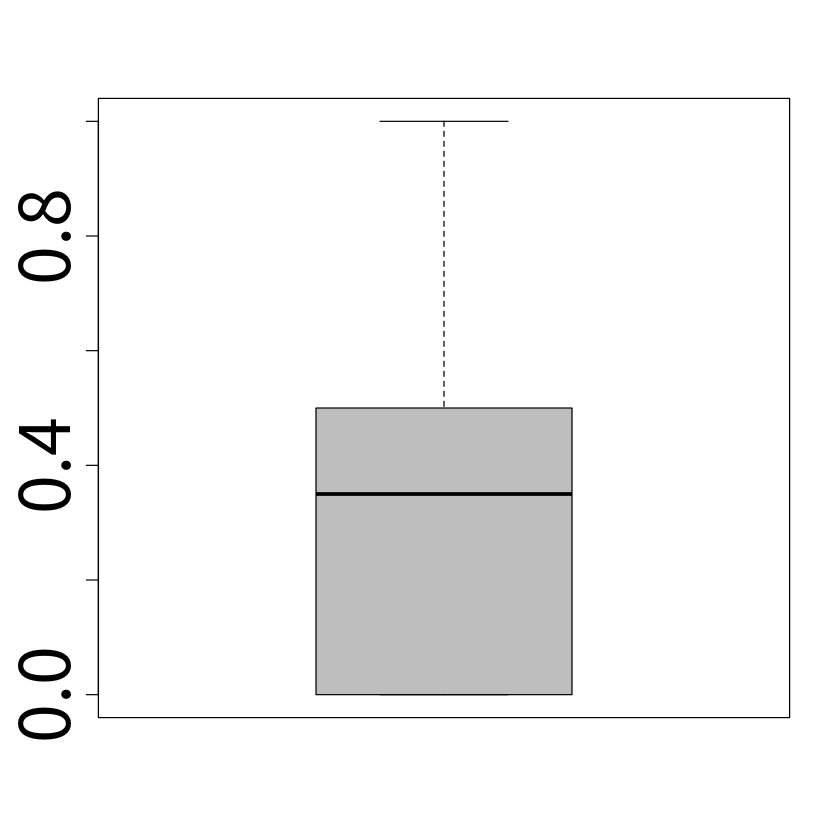

In [94]:
eq_file <- paste0("JI.txt")
if(exists("JI.final")) rm(JI.final)
    
    # Load clusters (equal distribution)
if(file.exists(eq_file)) {
    JI.final  <- read.table(eq_file, sep="\t", header=TRUE)
    print(JI.final)
    names(JI.final) <- paste0(names(JI.final), "_EQ")
    print(JI.final)
}
#par(mar=c(25,4,2,2)+.1)
boxplot(JI.final, xaxt="none", cex.axis=3.5, 
                 col=c('gray','gray','red','red','blue','blue','blueviolet','blueviolet','deeppink','deeppink','chocolate1','chocolate1','darkgoldenrod','darkgoldenrod','green','green','darkturquoise','darkturquoise'), 
                 ann=FALSE, outline=FALSE)

In [86]:
# Save all boxplots in a single PDF output file
pdf(file=paste0(results_folder, "simulated_boxplots.pdf"), width = 15, height = 15, onefile = TRUE)

# Output files for each distribution
    eq_file <- paste0("JI.txt")
    if(exists("JI.final")) rm(JI.final)
    
    # Load clusters (equal distribution)
    if(file.exists(eq_file)) {
        JI.final  <- read.table(eq_file, sep="\t", header=TRUE)
        print(JI.final)
        names(JI.final) <- paste0(names(JI.final), "_EQ")        
    }
    
    # Load clusters (heterogeneous distribution)
'''
    if(file.exists(het_file)) {
        JI.het <- read.table(het_file, sep="\t", header=TRUE)
        names_methods <- names(JI.het)
        names(JI.het) <- paste0(names(JI.het), "_HET")

        # Aggregate results
        if(exists("JI.final")) {
            JI.final <- data.frame(JI.het, JI.final)
            new_order <- apply(expand.grid(c("_HET", "_EQ"), names_methods)[, c(2,1)], 1, paste, collapse="")
            JI.final <- JI.final[, new_order]
        }
        else {
            JI.final <- JI.het
        }
    }'''
    
    # Plot results
    par(mar=c(25,4,2,2)+.1)
    boxplot(JI.final, xaxt="none", cex.axis=3.5, 
                 col=c('gray','gray','red','red','blue','blue','blueviolet','blueviolet','deeppink','deeppink','chocolate1','chocolate1','darkgoldenrod','darkgoldenrod','green','green','darkturquoise','darkturquoise'), 
                 ann=FALSE, outline=FALSE)
    matplot(1:ncol(JI.final), t(JI.final), col="black", pch=16, xaxt="none", cex=0.8, add=TRUE)
    axis(1, at=1:ncol(JI.final), labels=names(JI.final), 
         las=2, srt=45, cex=0.8, cex.lab=3.5, cex.axis=3.5, cex.main=1.5, cex.sub=1.5) 
    title(main=paste(i,"clusters",sep=" "), 
          cex.lab=0.75, line = -2.5, adj=0, cex.main=3.5)
dev.off()

ERROR: Error in parse(text = x, srcfile = src): <text>:16:3: unexpected string constant
30:         }
31:     }'
      ^
